<a href="https://colab.research.google.com/github/minolinesith/FYP/blob/Ensemble-Model/EnsembleModelSelections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Setting dataset path and loading dataset

In [7]:
train_path = '/content/drive/MyDrive/Dataset-FYP/Dataset/train'
valid_path = '/content/drive/MyDrive/Dataset-FYP/Dataset/validation'
test_path = '/content/drive/MyDrive/Dataset-FYP/Dataset/test'

In [8]:
img_width = 224
img_height = 224

In [9]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 10,
    validation_split = False,
)

Found 1601 files belonging to 8 classes.


In [10]:
valid_data = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 10,
    validation_split = False

)

Found 480 files belonging to 8 classes.


In [11]:
test_data = tf.keras.utils.image_dataset_from_directory(
    test_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 10,
    validation_split = False

)

Found 160 files belonging to 8 classes.


## Plotting images

In [ ]:
classes = train_data.class_names

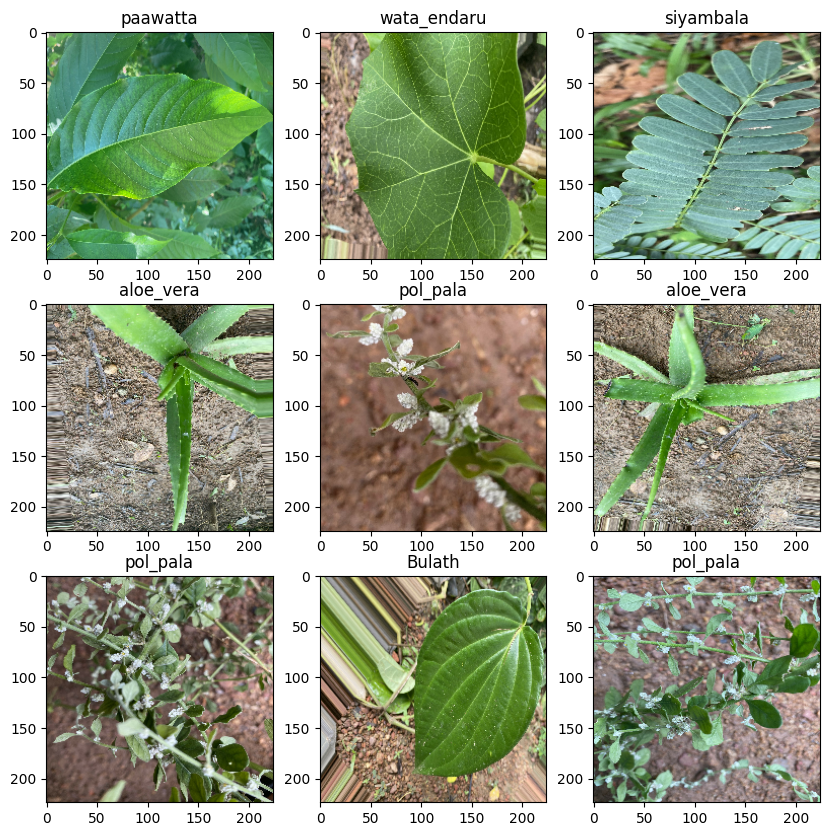

In [ ]:
plt.figure(figsize=(10,10))
for img, labels in train_data.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(img[i].numpy().astype('uint8'))
    plt.title(classes[labels[i]])

## Early Stoping declaration

In [12]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True )

# Training and testing each chosen pre-trained model to choose best models.

## Resnet50

In [ ]:
Resnet50_base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

94765736/94765736 [==============================] - 2s 0us/step


In [ ]:
for layer in Resnet50_base_model.layers:
    layer.trainable = False

In [ ]:
Resnet50_model = Sequential()
Resnet50_model.add(Resnet50_base_model)
Resnet50_model.add(layers.Flatten())
Resnet50_model.add(layers.Dense(512, activation='relu'))
Resnet50_model.add(layers.Dropout(0.5))
Resnet50_model.add(layers.Dense(8, activation ='softmax'))

In [ ]:
Resnet50_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
epochs = 10
resnet50_history = Resnet50_model.fit(train_data, validation_data = valid_data, epochs = epochs, callbacks=[callback])

Epoch 1/10
161/161 [==============================] - 585s 4s/step - loss: 0.4503 - accuracy: 0.9288 - val_loss: 0.0086 - val_accuracy: 0.9979
Epoch 2/10
161/161 [==============================] - 104s 619ms/step - loss: 0.0582 - accuracy: 0.9919 - val_loss: 2.3010e-06 - val_accuracy: 1.0000
Epoch 3/10
161/161 [==============================] - 98s 590ms/step - loss: 0.0489 - accuracy: 0.9919 - val_loss: 0.0041 - val_accuracy: 0.9979
Epoch 4/10
161/161 [==============================] - 103s 613ms/step - loss: 0.0887 - accuracy: 0.9900 - val_loss: 9.9341e-10 - val_accuracy: 1.0000
Epoch 5/10
161/161 [==============================] - 99s 594ms/step - loss: 0.0814 - accuracy: 0.9913 - val_loss: 0.0464 - val_accuracy: 0.9958
Epoch 6/10
161/161 [==============================] - 101s 596ms/step - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.0359 - val_accuracy: 0.9979
Epoch 7/10
161/161 [==============================] - 100s 598ms/step - loss: 0.0394 - accuracy: 0.9950 - val_loss: 1.162

In [ ]:
resnet50_test_loss, resnet50_test_accuracy = Resnet50_model.evaluate(test_data)

print(f'Test Accuracy: {resnet50_test_accuracy * 100:.2f}%')

16/16 [==============================] - 50s 3s/step - loss: 0.6342 - accuracy: 0.9062
Test Accuracy: 90.62%


## InceptionV3

In [ ]:
InceptionV3_base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [ ]:
for layer in InceptionV3_base_model.layers:
    layer.trainable = False

In [ ]:
InceptionV3_model = Sequential()
InceptionV3_model.add(InceptionV3_base_model)
InceptionV3_model.add(layers.Flatten())
InceptionV3_model.add(layers.Dense(512, activation='relu'))
InceptionV3_model.add(layers.Dropout(0.5))
InceptionV3_model.add(layers.Dense(8, activation ='softmax'))

In [ ]:
InceptionV3_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
epochs = 10
inceptionv3_history = InceptionV3_model.fit(train_data, validation_data = valid_data, epochs = epochs)

Epoch 1/10
161/161 [==============================] - 110s 624ms/step - loss: 23.9676 - accuracy: 0.4803 - val_loss: 1.2827 - val_accuracy: 0.5604
Epoch 2/10
161/161 [==============================] - 100s 600ms/step - loss: 1.4785 - accuracy: 0.5078 - val_loss: 1.2870 - val_accuracy: 0.5250
Epoch 3/10
161/161 [==============================] - 104s 621ms/step - loss: 1.4501 - accuracy: 0.5309 - val_loss: 1.2169 - val_accuracy: 0.6375
Epoch 4/10
161/161 [==============================] - 123s 742ms/step - loss: 1.3675 - accuracy: 0.5578 - val_loss: 1.0817 - val_accuracy: 0.6438
Epoch 5/10
161/161 [==============================] - 102s 609ms/step - loss: 1.2863 - accuracy: 0.5222 - val_loss: 1.1269 - val_accuracy: 0.6333
Epoch 6/10
161/161 [==============================] - 123s 746ms/step - loss: 1.3213 - accuracy: 0.5297 - val_loss: 1.1925 - val_accuracy: 0.6208
Epoch 7/10
161/161 [==============================] - 102s 611ms/step - loss: 1.4038 - accuracy: 0.5209 - val_loss: 1.1943 

In [ ]:
inceptionv3_test_loss, inceptionv3_test_accuracy = InceptionV3_model.evaluate(test_data)

print(f'Test Accuracy: {inceptionv3_test_accuracy * 100:.2f}%')

16/16 [==============================] - 10s 597ms/step - loss: 3.0328 - accuracy: 0.2313
Test Accuracy: 23.13%


## MobileNet V2

In [ ]:
MobileNetV2_base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
for layer in MobileNetV2_base_model.layers:
    layer.trainable = False

In [ ]:
MobileNetV2_model = Sequential()
MobileNetV2_model.add(MobileNetV2_base_model)
MobileNetV2_model.add(layers.Flatten())
MobileNetV2_model.add(layers.Dense(512, activation='relu'))
MobileNetV2_model.add(layers.Dropout(0.5))
MobileNetV2_model.add(layers.Dense(8, activation ='softmax'))

In [ ]:
MobileNetV2_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [42]:
epochs = 10
mobilenetv2_history = MobileNetV2_model.fit(train_data, validation_data = valid_data, epochs = epochs, callbacks=[callback])

Epoch 1/10
161/161 [==============================] - 112s 627ms/step - loss: 1.1040 - accuracy: 0.7314 - val_loss: 0.3321 - val_accuracy: 0.8938
Epoch 2/10
161/161 [==============================] - 101s 604ms/step - loss: 0.2747 - accuracy: 0.9069 - val_loss: 0.1333 - val_accuracy: 0.9604
Epoch 3/10
161/161 [==============================] - 98s 586ms/step - loss: 0.2217 - accuracy: 0.9244 - val_loss: 0.1716 - val_accuracy: 0.9333
Epoch 4/10
161/161 [==============================] - 100s 601ms/step - loss: 0.1257 - accuracy: 0.9557 - val_loss: 0.1317 - val_accuracy: 0.9542
Epoch 5/10
161/161 [==============================] - 98s 583ms/step - loss: 0.0898 - accuracy: 0.9700 - val_loss: 0.0812 - val_accuracy: 0.9646
Epoch 6/10
161/161 [==============================] - 101s 602ms/step - loss: 0.0951 - accuracy: 0.9681 - val_loss: 0.1220 - val_accuracy: 0.9542
Epoch 7/10
161/161 [==============================] - 102s 611ms/step - loss: 0.0622 - accuracy: 0.9788 - val_loss: 0.0815 - v

In [43]:
mobilenetv2_test_loss, mobilenetv2_test_accuracy = InceptionResnetV2_model.evaluate(test_data)

print(f'Test Accuracy: {mobilenetv2_test_accuracy * 100:.2f}%')

16/16 [==============================] - 13s 820ms/step - loss: 2.0994 - accuracy: 0.1250
Test Accuracy: 12.50%


## EfficientNet B5

In [44]:
EfficientNetB5_base_model = tf.keras.applications.EfficientNetB5(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

115263384/115263384 [==============================] - 4s 0us/step


In [45]:
for layer in EfficientNetB5_base_model.layers:
    layer.trainable = False

In [46]:
EfficientNetB5_model = Sequential()
EfficientNetB5_model.add(EfficientNetB5_base_model)
EfficientNetB5_model.add(layers.Flatten())
EfficientNetB5_model.add(layers.Dense(512, activation='relu'))
EfficientNetB5_model.add(layers.Dropout(0.5))
EfficientNetB5_model.add(layers.Dense(8, activation ='softmax'))

In [47]:
EfficientNetB5_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [48]:
epochs = 10
efficientnetb5_history = EfficientNetB5_model.fit(train_data, validation_data = valid_data, epochs = epochs, callbacks=[callback])

Epoch 1/10
161/161 [==============================] - 129s 677ms/step - loss: 0.3929 - accuracy: 0.9019 - val_loss: 0.0184 - val_accuracy: 0.9937
Epoch 2/10
161/161 [==============================] - 107s 643ms/step - loss: 0.0356 - accuracy: 0.9844 - val_loss: 0.0079 - val_accuracy: 0.9979
Epoch 3/10
161/161 [==============================] - 104s 622ms/step - loss: 0.0413 - accuracy: 0.9881 - val_loss: 0.0527 - val_accuracy: 0.9896
Epoch 4/10
161/161 [==============================] - 97s 584ms/step - loss: 0.1314 - accuracy: 0.9775 - val_loss: 0.0029 - val_accuracy: 0.9979
Epoch 5/10
161/161 [==============================] - 105s 631ms/step - loss: 0.0444 - accuracy: 0.9906 - val_loss: 0.0088 - val_accuracy: 0.9979
Epoch 6/10
161/161 [==============================] - 104s 626ms/step - loss: 0.0119 - accuracy: 0.9956 - val_loss: 0.0199 - val_accuracy: 0.9937
Epoch 7/10
161/161 [==============================] - 106s 628ms/step - loss: 0.0400 - accuracy: 0.9906 - val_loss: 0.0184 - 

In [50]:
efficientnetb5_test_loss, efficientnetb5_test_accuracy = EfficientNetB5_model.evaluate(test_data)

print(f'Test Accuracy: {efficientnetb5_test_accuracy * 100:.2f}%')

16/16 [==============================] - 8s 473ms/step - loss: 0.2337 - accuracy: 0.9500
Test Accuracy: 95.00%


## Xception

In [51]:
Xception_base_model = tf.keras.applications.Xception(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

83683744/83683744 [==============================] - 3s 0us/step


In [52]:
for layer in Xception_base_model.layers:
    layer.trainable = False

In [53]:
Xception_model = Sequential()
Xception_model.add(Xception_base_model)
Xception_model.add(layers.Flatten())
Xception_model.add(layers.Dense(512, activation='relu'))
Xception_model.add(layers.Dropout(0.5))
Xception_model.add(layers.Dense(8, activation ='softmax'))

In [54]:
Xception_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [55]:
epochs = 10
xception_history = Xception_model.fit(train_data, validation_data = valid_data, epochs = epochs, callbacks=[callback])

Epoch 1/10
161/161 [==============================] - 108s 624ms/step - loss: 13.8412 - accuracy: 0.4447 - val_loss: 1.2869 - val_accuracy: 0.5958
Epoch 2/10
161/161 [==============================] - 101s 603ms/step - loss: 1.5153 - accuracy: 0.5603 - val_loss: 1.4755 - val_accuracy: 0.6000
Epoch 3/10
161/161 [==============================] - 104s 618ms/step - loss: 1.2404 - accuracy: 0.6071 - val_loss: 0.9030 - val_accuracy: 0.6917
Epoch 4/10
161/161 [==============================] - 101s 607ms/step - loss: 1.1674 - accuracy: 0.6077 - val_loss: 1.0777 - val_accuracy: 0.6979
Epoch 5/10
161/161 [==============================] - 102s 613ms/step - loss: 1.0237 - accuracy: 0.6521 - val_loss: 0.8542 - val_accuracy: 0.7479
Epoch 6/10
161/161 [==============================] - 101s 601ms/step - loss: 1.0068 - accuracy: 0.6496 - val_loss: 0.8857 - val_accuracy: 0.7146
Epoch 7/10
161/161 [==============================] - 105s 621ms/step - loss: 0.8680 - accuracy: 0.6964 - val_loss: 0.8252 

In [84]:
xception_test_loss, xception_test_accuracy = Xception_model.evaluate(test_data)

print(f'Test Accuracy: {xception_test_accuracy * 100:.2f}%')

16/16 [==============================] - 7s 429ms/step - loss: 5.3531 - accuracy: 0.3313
Test Accuracy: 33.13%


## DenseNet 121

In [13]:
DenseNet121_base_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

29084464/29084464 [==============================] - 0s 0us/step


In [14]:
for layer in DenseNet121_base_model.layers:
    layer.trainable = False

In [15]:
DenseNet121_model = Sequential()
DenseNet121_model.add(DenseNet121_base_model)
DenseNet121_model.add(layers.Flatten())
DenseNet121_model.add(layers.Dense(512, activation='relu'))
DenseNet121_model.add(layers.Dropout(0.5))
DenseNet121_model.add(layers.Dense(8, activation ='softmax'))

In [16]:
DenseNet121_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [17]:
epochs = 10
densenet121_history = DenseNet121_model.fit(train_data, validation_data = valid_data, epochs = epochs, callbacks=[callback])

Epoch 1/10
161/161 [==============================] - 514s 3s/step - loss: 3.3082 - accuracy: 0.6952 - val_loss: 0.4624 - val_accuracy: 0.9104
Epoch 2/10
161/161 [==============================] - 465s 3s/step - loss: 0.4613 - accuracy: 0.9313 - val_loss: 0.3295 - val_accuracy: 0.9396
Epoch 3/10
161/161 [==============================] - 461s 3s/step - loss: 0.3216 - accuracy: 0.9532 - val_loss: 0.5672 - val_accuracy: 0.9250
Epoch 4/10
161/161 [==============================] - 470s 3s/step - loss: 0.2311 - accuracy: 0.9606 - val_loss: 0.4685 - val_accuracy: 0.9479
Epoch 5/10
161/161 [==============================] - 472s 3s/step - loss: 0.1196 - accuracy: 0.9775 - val_loss: 0.1502 - val_accuracy: 0.9792
Epoch 6/10
161/161 [==============================] - 468s 3s/step - loss: 0.1023 - accuracy: 0.9844 - val_loss: 0.1439 - val_accuracy: 0.9792
Epoch 7/10
161/161 [==============================] - 460s 3s/step - loss: 0.0673 - accuracy: 0.9888 - val_loss: 0.2010 - val_accuracy: 0.9771

In [18]:
densenet121_test_loss, densenet121_test_accuracy = DenseNet121_model.evaluate(test_data)

print(f'Test Accuracy: {densenet121_test_accuracy * 100:.2f}%')

16/16 [==============================] - 43s 3s/step - loss: 9.4073 - accuracy: 0.4563
Test Accuracy: 45.63%


## VGG16


In [63]:
VGG16_base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [64]:
for layer in VGG16_base_model.layers:
    layer.trainable = False

In [65]:
vgg16_model = Sequential()
vgg16_model.add(VGG16_base_model)
vgg16_model.add(layers.Flatten())
vgg16_model.add(layers.Dense(512, activation='relu'))
vgg16_model.add(layers.Dropout(0.5))
vgg16_model.add(layers.Dense(8, activation ='softmax'))

In [66]:
vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [68]:
epochs = 10
vgg16_history = vgg16_model.fit(train_data, validation_data = valid_data, epochs = epochs, callbacks=[callback])

Epoch 1/10
161/161 [==============================] - 105s 612ms/step - loss: 2.6801 - accuracy: 0.8857 - val_loss: 0.0041 - val_accuracy: 0.9979
Epoch 2/10
161/161 [==============================] - 100s 598ms/step - loss: 0.4279 - accuracy: 0.9750 - val_loss: 0.1196 - val_accuracy: 0.9875
Epoch 3/10
161/161 [==============================] - 93s 548ms/step - loss: 0.0599 - accuracy: 0.9950 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
161/161 [==============================] - 102s 592ms/step - loss: 0.0660 - accuracy: 0.9925 - val_loss: 7.5377e-05 - val_accuracy: 1.0000
Epoch 5/10
161/161 [==============================] - 118s 710ms/step - loss: 0.0981 - accuracy: 0.9969 - val_loss: 0.0188 - val_accuracy: 0.9979
Epoch 6/10
161/161 [==============================] - 104s 619ms/step - loss: 0.0923 - accuracy: 0.9925 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [69]:
vgg16_test_loss, vgg16_test_accuracy = vgg16_model.evaluate(test_data)

print(f'Test Accuracy: {vgg16_test_accuracy * 100:.2f}%')

16/16 [==============================] - 7s 416ms/step - loss: 1.8051 - accuracy: 0.8500
Test Accuracy: 85.00%


## Displaying Accuracies

In [86]:
accuracies = { 'Models': ['Resnet50','InceptionV3','MobileNet V2','EfficientNet B5','Xception','DenseNet 121','Vgg16'],
              'Accuracy':[resnet50_test_accuracy*100,inceptionv3_test_accuracy*100,mobilenetv2_test_accuracy*100,efficientnetb5_test_accuracy*100,xception_test_accuracy*100,densenet121_test_accuracy*100,vgg16_test_accuracy*100]
}

In [87]:
accuracies_df = pd.DataFrame(accuracies)

In [88]:
accuracies_df

,Models,Accuracy
0,Resnet50,90.625000
1,InceptionV3,23.125000
2,MobileNet V2,12.500000
3,EfficientNet B5,94.999999
4,Xception,33.125001
5,DenseNet 121,48.750001
6,Vgg16,85.000002
